In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
data_1=pd.read_csv("/content/DrDoS_DNS_data_1_per.csv",low_memory=False)
num_rows, num_columns = data_1.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


Number of rows: 14170
Number of columns: 88


In [ ]:
for column in data_1.columns:
    data_type = data_1[column].dtype
    print(f"Feature: {column}, Data Type: {data_type}")


Feature: Unnamed: 0, Data Type: int64
Feature: Flow ID, Data Type: object
Feature:  Source IP, Data Type: object
Feature:  Source Port, Data Type: int64
Feature:  Destination IP, Data Type: object
Feature:  Destination Port, Data Type: int64
Feature:  Protocol, Data Type: int64
Feature:  Timestamp, Data Type: object
Feature:  Flow Duration, Data Type: int64
Feature:  Total Fwd Packets, Data Type: int64
Feature:  Total Backward Packets, Data Type: int64
Feature: Total Length of Fwd Packets, Data Type: float64
Feature:  Total Length of Bwd Packets, Data Type: float64
Feature:  Fwd Packet Length Max, Data Type: float64
Feature:  Fwd Packet Length Min, Data Type: float64
Feature:  Fwd Packet Length Mean, Data Type: float64
Feature:  Fwd Packet Length Std, Data Type: float64
Feature: Bwd Packet Length Max, Data Type: float64
Feature:  Bwd Packet Length Min, Data Type: float64
Feature:  Bwd Packet Length Mean, Data Type: float64
Feature:  Bwd Packet Length Std, Data Type: float64
Feature: Fl

In [ ]:
data_2=pd.read_csv("/content/syn_data.csv")
num_rows, num_columns = data_2.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')


Number of rows: 6905
Number of columns: 88


In [ ]:
merged_df = pd.concat([data_1, data_2], axis=0, ignore_index=True)


In [ ]:
merged_df.to_csv("merged_dataset.csv", index=False)


In [ ]:
merged_df=pd.read_csv("merged_dataset.csv")

<ipython-input-7-9eacf52bafec>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df=pd.read_csv("merged_dataset.csv")


In [ ]:
num_rows, num_columns = merged_df.shape
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')
merged_df.columns = merged_df.columns.str.strip()


Number of rows: 21075
Number of columns: 88


In [ ]:
df=merged_df.iloc[:,:]
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,DrDoS_DNS


In [ ]:

for i in range(0,len(col)-1):
  if(col[i]=='Source IP' or col[i]=='Destination IP' or col[i]=='Flow ID' or col[i]=="Timestamp" or col[i]=="SimillarHTTP" or col[i]=="Idle Max"):
    print()
  else:
    nan_count = df[col[i]].isna().sum()
    if(nan_count!=0):
      print("ok")





ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok

ok

ok


In [ ]:
df = df[df['Label'] !=0 ]
df = df[df['Label'] != 3]



In [ ]:
#df.dtypes

In [ ]:
#df.isnull().sum()
col=df.columns

In [ ]:
df['Destination IP'].head()

In [ ]:

missing_values = df['Source IP'].isna()
df.loc[missing_values, 'Source IP'] = '0.0.0.0'


In [ ]:

missing_values = df['Destination IP'].isna()
df.loc[missing_values, 'Destination IP'] = '0.0.0.0'


In [ ]:

missing_values = df['Flow ID'].isna()
df.loc[missing_values, 'Flow ID'] = '0.0.0.0'

In [ ]:
for i in range(0,len(col)-1):
  if(col[i]=='Source IP' or col[i]=='Destination IP' or col[i]=='Flow ID'):
    print()
  else:
    df[col[i]].fillna(1, inplace=True)

In [ ]:
df.interpolate(method='linear', inplace=True)
df.fillna(method='bfill', inplace=True)

In [ ]:
k=df.isnull().sum()
print(k)

Unnamed: 0        0
Flow ID           0
Source IP         0
Source Port       0
Destination IP    0
                 ..
Idle Max          0
Idle Min          0
SimillarHTTP      0
Inbound           0
Label             1
Length: 88, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])


In [ ]:
output=df['Label'].value_counts()
print(output)


1    13016
2     6903
Name: Label, dtype: int64


In [ ]:
#preprocess
#flow_id
flow_id=df['Flow ID']
j=0
l=""
ip=[]
g=flow_id
for h in g:
  ip_parts = h.split(".")
  for i in ip_parts:
    if("-" in i):
      part=i.split("-")
      for k in part:
        l+=k
      ip_parts[j]=l
    part=[]
    l=""
    j=j+1
  j=0
  ip_integers=[int(octet) for octet in ip_parts]
  ip.append(ip_integers)

In [ ]:
flow_df = pd.DataFrame(ip, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [ ]:

flow_df=flow_df.iloc[:,:]
flow_df.head()

,a,b,c,d,e,f,g
0,172,16,0,5192,168,50,16346049517
1,172,16,0,5192,168,50,16049563417
2,172,16,0,5192,168,50,16344639117
3,172,16,0,5192,168,50,16341189417
4,172,16,0,5192,168,50,16342787817


In [ ]:
#source ip
source=df['Source IP']
src=[]
g=source
for h in g:
  ip_parts = h.split(".")
  src_integers=[int(octet) for octet in ip_parts]
  src.append(src_integers)
  ip_parts=[]

In [ ]:
src_df=pd.DataFrame(src,columns=['i','j','k','l'])
src_df.head()
src_df.iloc[:,:]

,i,j,k,l
0,172,16,0,5
1,192,168,50,1
2,172,16,0,5
3,172,16,0,5
4,172,16,0,5
...,...,...,...,...
19914,172,16,0,5
19915,172,16,0,5
19916,172,16,0,5
19917,172,16,0,5


In [ ]:
#destination ip
dest=df['Destination IP']
des=[]
g=dest
for h in g:
    ip_parts = h.split(".")
    des_integers=[int(octet) for octet in ip_parts]
    des.append(des_integers)
    ip_parts=[]

In [ ]:
des_df=pd.DataFrame(des,columns=['m','n','o','p'])
des_df.head()
des_df=des_df.iloc[:,:]
des_df.head()

,m,n,o,p
0,192,168,50,1
1,172,16,0,5
2,192,168,50,1
3,192,168,50,1
4,192,168,50,1


In [ ]:

df.drop(columns=["Flow ID", "Source IP","Destination IP"], inplace=True)


In [ ]:
df.drop(columns=["Timestamp"],inplace=True)
df.drop(columns=["SimillarHTTP"],inplace=True)


In [ ]:
df.drop(columns=["Idle Max"],inplace=True)

In [ ]:
df.head()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Min,Inbound,Label
0,425,634,60495,17,28415,97,0,42680.0,0.0,440.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,430,634,60495,17,2,2,0,880.0,0.0,440.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1654,634,46391,17,48549,200,0,88000.0,0.0,440.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,2927,634,11894,17,48337,200,0,88000.0,0.0,440.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,694,634,27878,17,32026,200,0,88000.0,0.0,440.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
df
lab=df.iloc[:,-1]
dat=df.iloc[:,:-1]


In [ ]:
labels =df['Label'].values
data=df.iloc[:,:-1]
df.shape

(19919, 82)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dat, lab, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(flow_df, lab, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(src_df, lab, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(des_df, lab, test_size=0.2, random_state=42)




In [ ]:
print(len(X_test_1),len(y_test_1))

3984 3984


In [ ]:
#dat preprocess
from sklearn.preprocessing import StandardScaler

import numpy as np

for col_name in dat.columns:
    if dat[col_name].dtype != 'object':
        max_value = np.max(dat[col_name])
        min_value = np.min(dat[col_name])
        if np.isinf(max_value) or np.isinf(min_value) or max_value > 1e6 or min_value < -1e6:
            print(f"Column {col_name} has large or infinite values.")




Column Flow Duration has large or infinite values.
Column Flow Bytes/s has large or infinite values.
Column Flow Packets/s has large or infinite values.
Column Flow IAT Mean has large or infinite values.
Column Flow IAT Std has large or infinite values.
Column Flow IAT Max has large or infinite values.
Column Flow IAT Min has large or infinite values.
Column Fwd IAT Total has large or infinite values.
Column Fwd IAT Mean has large or infinite values.
Column Fwd IAT Std has large or infinite values.
Column Fwd IAT Max has large or infinite values.
Column Fwd IAT Min has large or infinite values.
Column Bwd IAT Total has large or infinite values.
Column Bwd IAT Mean has large or infinite values.
Column Bwd IAT Std has large or infinite values.
Column Bwd IAT Max has large or infinite values.
Column Fwd Header Length has large or infinite values.
Column Fwd Packets/s has large or infinite values.
Column Fwd Header Length.1 has large or infinite values.
Column min_seg_size_forward has larg

In [ ]:
large_value = 1000
dat.replace([np.inf, -np.inf], large_value, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scalers = {}
for col_name in dat.columns:
    if dat[col_name].dtype != 'object':
        scaler = StandardScaler()
        dat[col_name] = scaler.fit_transform(dat[col_name].values.reshape(-1, 1))
        scalers[col_name] = scaler


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Dense, Concatenate
from keras.models import Model
from keras.utils import to_categorical


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dat, lab, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(flow_df, lab, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(src_df, lab, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(des_df, lab, test_size=0.2, random_state=42)


num_classes = 2



input_shape_1 = (81,)
input_shape_2 = (7,)
input_shape_3 = (4,)
input_shape_4 = (4,)

input_1 = Input(shape=input_shape_1)
input_2 = Input(shape=input_shape_2)
input_3 = Input(shape=input_shape_3)
input_4 = Input(shape=input_shape_4)


branch_1 = Dense(64, activation='relu')(input_1)
branch_2 = Dense(64, activation='relu')(input_2)
branch_3 = Dense(64, activation='relu')(input_3)
branch_4 = Dense(64, activation='relu')(input_4)

merged = Concatenate()([branch_1, branch_2, branch_3, branch_4])


fc_layer = Dense(64, activation='relu')(merged)


output = Dense(1, activation='softmax')(fc_layer)




model_1= Model(inputs=[input_1, input_2, input_3, input_4], outputs=output)


model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
    run_eagerly=True,
)


model_1.fit([X_train_1, X_train_2, X_train_3, X_train_4], y_train_1, epochs=5, batch_size=32)


loss_and_metrics = model_1.evaluate([X_test_1, X_test_2, X_test_3, X_test_4], y_test_1)


loss = loss_and_metrics[0]
accuracy = loss_and_metrics[1]

print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/5
498/498 [==============================] - 26s 51ms/step - loss: -5007536029696.0000 - accuracy: 0.6538
Epoch 2/5
498/498 [==============================] - 26s 52ms/step - loss: -83510496854016.0000 - accuracy: 0.6538
Epoch 3/5
498/498 [==============================] - 25s 49ms/step - loss: -345100555124736.0000 - accuracy: 0.6538
Epoch 4/5
498/498 [==============================] - 39s 78ms/step - loss: -868200996667392.0000 - accuracy: 0.6538
Epoch 5/5
125/125 [==============================] - 2s 13ms/step - loss: -2329849570000896.0000 - accuracy: 0.6519
Loss: -2329849570000896.0
Accuracy: 0.6518574357032776


In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 81)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                              

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
lab = label_encoder.fit_transform(lab)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, LSTM, Dense, Concatenate
from keras.models import Model
from keras.utils import to_categorical

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dat, lab, test_size=0.2, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(flow_df, lab, test_size=0.2, random_state=42)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(src_df, lab, test_size=0.2, random_state=42)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(des_df, lab, test_size=0.2, random_state=42)


num_classes = 2
y_train_1_encoded = to_categorical(y_train_1, num_classes=num_classes)
y_train_2_encoded = to_categorical(y_train_2, num_classes=num_classes)
y_train_3_encoded = to_categorical(y_train_3, num_classes=num_classes)
y_train_4_encoded = to_categorical(y_train_4, num_classes=num_classes)
y_test_1_encoded=to_categorical(y_test_4, num_classes=num_classes)


input_shape_1 = (X_train_1.shape[1], 1)
input_shape_2 = (X_train_2.shape[1], 1)
input_shape_3 = (X_train_3.shape[1], 1)
input_shape_4 = (X_train_4.shape[1], 1)


input_1 = Input(shape=input_shape_1)
input_2 = Input(shape=input_shape_2)
input_3 = Input(shape=input_shape_3)
input_4 = Input(shape=input_shape_4)

lstm_1 = LSTM(64, activation='relu')(input_1)
lstm_2 = LSTM(64, activation='relu')(input_2)
lstm_3 = LSTM(64, activation='relu')(input_3)
lstm_4 = LSTM(64, activation='relu')(input_4)


merged = Concatenate()([lstm_1, lstm_2, lstm_3, lstm_4])


fc_layer = Dense(64, activation='relu')(merged)

output = Dense(num_classes, activation='sigmoid')(fc_layer)

optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)


model_2 = Model(inputs=[input_1, input_2, input_3, input_4], outputs=output)

model_2.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
    run_eagerly=True,
)

model_2.fit([X_train_1, X_train_2, X_train_3, X_train_4], y_train_1_encoded, epochs=5, batch_size=60)

loss_and_metrics = model_2.evaluate([X_test_1, X_test_2, X_test_3, X_test_4], y_test_1_encoded)


loss = loss_and_metrics[0]
accuracy = loss_and_metrics[1]


print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/5
266/266 [==============================] - 131s 492ms/step - loss: 103421408.0000 - accuracy: 0.5853
Epoch 2/5
266/266 [==============================] - 120s 453ms/step - loss: 43357036.0000 - accuracy: 0.5982
Epoch 3/5
266/266 [==============================] - 172s 647ms/step - loss: 2523390976.0000 - accuracy: 0.6046
Epoch 4/5
266/266 [==============================] - 123s 462ms/step - loss: 223469536.0000 - accuracy: 0.7570
Epoch 5/5
125/125 [==============================] - 29s 234ms/step - loss: 13891035136.0000 - accuracy: 0.6069
Loss: 13891035136.0
Accuracy: 0.6069276928901672


In [ ]:
model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 81, 1)]              0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 7, 1)]               0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 4, 1)]               0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 4, 1)]               0         []                            
                                                                                            

In [ ]:

X_test_combined = [X_test_1, X_test_2, X_test_3, X_test_4]

predictions_combined_1= model_1.predict(X_test_combined)
predictions_combined_2= model_2.predict(X_test_combined)




125/125 [==============================] - 28s 222ms/step


In [ ]:
import pandas as pd
import numpy as np


predictions_df = pd.DataFrame({
    'Prediction_1': np.argmax(predictions_combined_1, axis=1),
    'Prediction_2': np.argmax(predictions_combined_2, axis=1)

})

def determine_max_prediction(row):
    if row['Prediction_1'] == 0 and row['Prediction_2'] == 0:
        return 0
    elif row['Prediction_1'] == 1 and row['Prediction_2'] == 1:
        return 1
    else:
        return 2


predictions_df['Max_Prediction'] = predictions_df.apply(determine_max_prediction, axis=1)




In [ ]:
predictions_df.head()

,Prediction_1,Prediction_2,Max_Prediction
0,0,1,2
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X = predictions_df.drop(columns=['Max_Prediction'])
y = predictions_df['Max_Prediction']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier()


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


[0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 2 0 0 0 2 0 2 0
 0 2 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 2
 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 0 0 0 0 2 2 0 0 0 0 2 2 0 0 2 0 0 2 0 0 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0
 2 2 2 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 2 0 0 2 2 0 2 0 0 0 0
 0 0 2 2 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 2
 0 2 2 0 0 2 0 2 0 0 2 0 0 2 2 0 0 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 2 0 0 0 0 0 

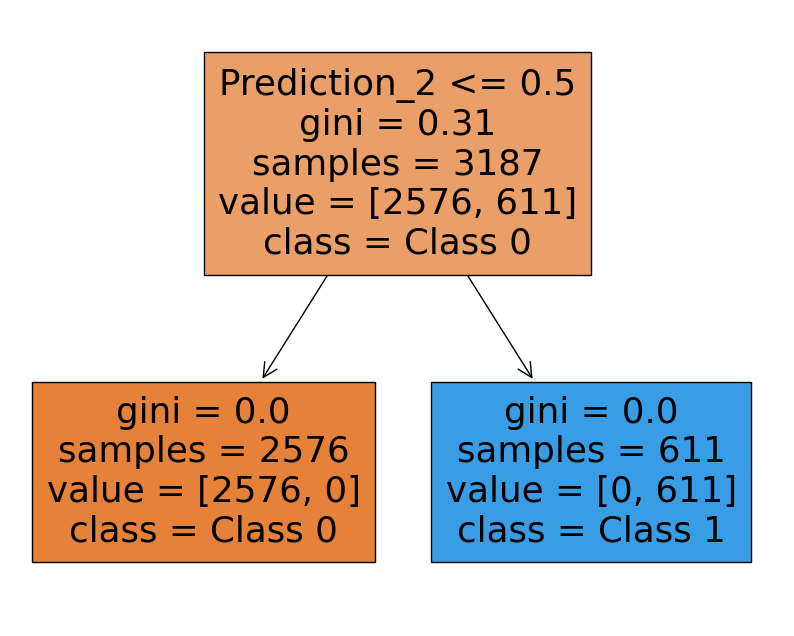

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1", "Class 2"])
plt.show()


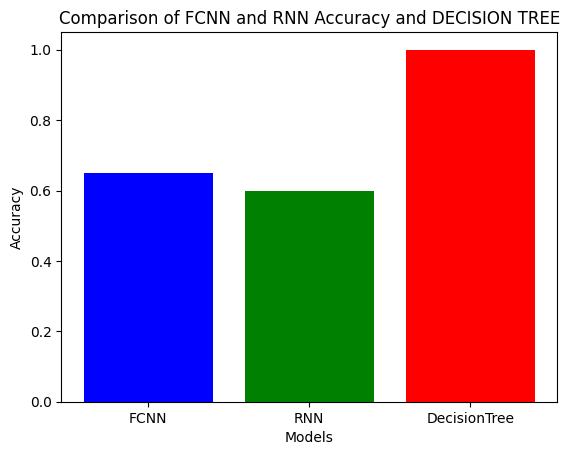

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy scores for FCNN and RNN
fcnn_accuracy = 0.65
rnn_accuracy = 0.60
deci=1.0

# Create labels for the models
models = ['FCNN', 'RNN','DecisionTree']

# Create a list of accuracy scores
accuracy_scores = [fcnn_accuracy, rnn_accuracy,deci]

# Create a bar graph
plt.bar(models, accuracy_scores, color=['blue', 'green','red'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of FCNN and RNN Accuracy and DECISION TREE')

# Show the graph
plt.show()

